In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


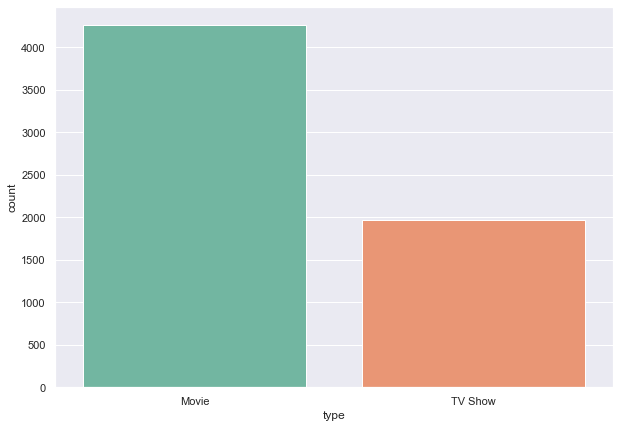

In [44]:
# Data visualization
# Based on the type

plt.figure(figsize=(10,7))
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")


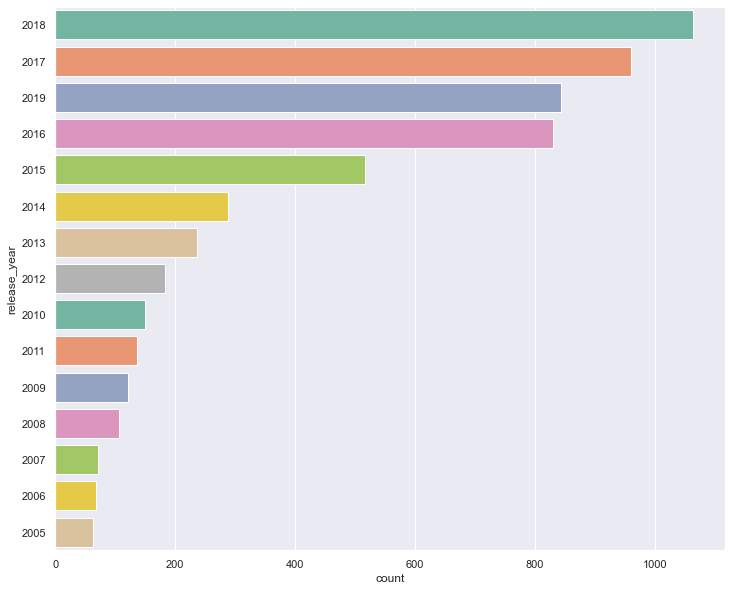

In [45]:
# Based on year

plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='release_year', data=df, palette="Set2", order=df['release_year'].value_counts().index[0:15])



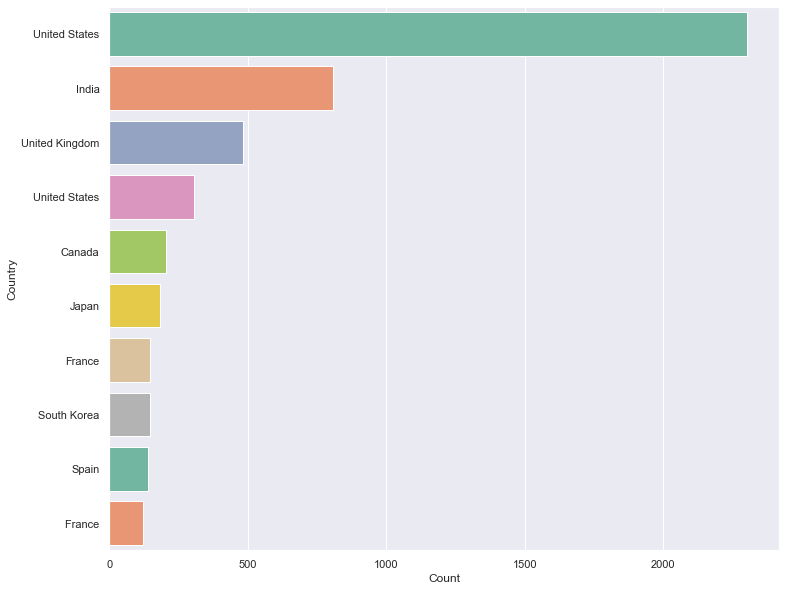

In [46]:
# Based on the country

import itertools
list_country = [x.split(',') for x in df.dropna(subset=['country'])['country'].tolist()]
list_country = list(itertools.chain(*list_country))

from collections import Counter
df_country_count = pd.DataFrame(Counter(list_country).most_common()[:10],columns=['Country','Count'])

plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.barplot(y="Country", x='Count', data=df_country_count, palette="Set2", orient='h')



In [47]:
df_netflix = df.drop(columns=['director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'type'])
df_netflix.head()

,show_id,title,listed_in,description
0,81145628,Norm of the North: King Sized Adventure,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Jandino: Whatever it Takes,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,Transformers Prime,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,Transformers: Robots in Disguise,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,#realityhigh,Comedies,When nerdy high schooler Dani finally attracts...


In [48]:
# Preprocessing

from nltk.tokenize import word_tokenize

cols = ['title','listed_in','description']
for col in cols:
    df_netflix[col+'_list'] = df_netflix[col].str.lower().apply(word_tokenize)

In [49]:
from nltk.corpus import stopwords
from string import punctuation

list_stopwords = set(stopwords.words('english')+list(punctuation))

cols = ['title_list','listed_in_list','description_list']
for col in cols:
    df_netflix[col] = df_netflix[col].apply(lambda x: [word for word in x if word not in list_stopwords])

In [50]:
df_netflix.head()

,show_id,title,listed_in,description,title_list,listed_in_list,description_list
0,81145628,Norm of the North: King Sized Adventure,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,"[norm, north, king, sized, adventure]","[children, family, movies, comedies]","[planning, awesome, wedding, grandfather, pola..."
1,80117401,Jandino: Whatever it Takes,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,"[jandino, whatever, takes]","[stand-up, comedy]","[jandino, asporaat, riffs, challenges, raising..."
2,70234439,Transformers Prime,Kids' TV,"With the help of three human allies, the Autob...","[transformers, prime]","[kids, tv]","[help, three, human, allies, autobots, protect..."
3,80058654,Transformers: Robots in Disguise,Kids' TV,When a prison ship crash unleashes hundreds of...,"[transformers, robots, disguise]","[kids, tv]","[prison, ship, crash, unleashes, hundreds, dec..."
4,80125979,#realityhigh,Comedies,When nerdy high schooler Dani finally attracts...,[realityhigh],[comedies],"[nerdy, high, schooler, dani, finally, attract..."


In [51]:
import string

df_netflix['description_list'] = df_netflix['description_list'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df_netflix['description_list'] = df_netflix['description_list'].apply(lambda x : [word for word in x if len(word) > 0])

In [52]:
cols = ['title_list','listed_in_list','description_list']

for col in cols:
    df_netflix[col] = df_netflix[col].apply(lambda x:list(set(x)))

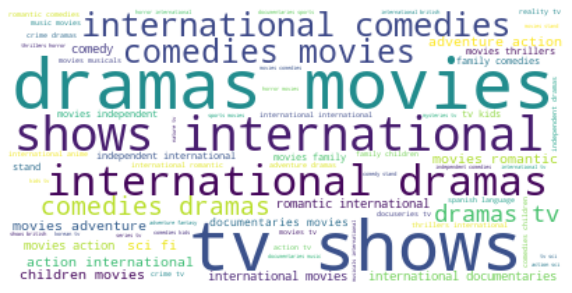

In [53]:

# WordCloud for Genres

from wordcloud import WordCloud

list_genre = df_netflix['listed_in_list'].tolist()
list_genre = list(itertools.chain(*list_genre))
genre = ' '.join(list_genre)

plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=50,max_words=100,background_color='white').generate(genre)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

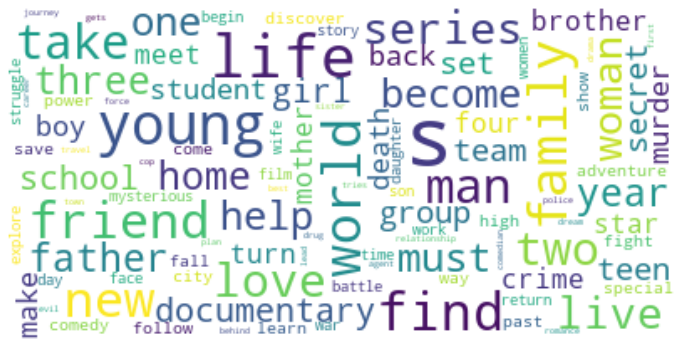

In [54]:
# Word Cloud for description

list_description = df_netflix['description_list'].tolist()
list_description = list(itertools.chain(*list_description))
description = ' '.join(list_description)

plt.figure(figsize=(12,10))
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(description)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [55]:
# We are building recommendation based on genres,description and tites

df_netflix.drop(['listed_in','description'],axis=1,inplace=True)

df_netflix.rename(columns = {'listed_in_list':'listed_in','description_list':'description'},inplace=True)

In [60]:
import gensim

wv = gensim.models.KeyedVectors.load_word2vec_format("C:\\Users\\hp\\Documents\\DataScience\\Recommendation Systems\\Netflix\\GoogleNews-vectors-negative300.bin.gz", binary=True)

In [65]:
matrix_netflix_vocab = []

for list_ in df_netflix.to_numpy():
    list_[2] = [word for word in list_[2] if word in wv.key_to_index]
    list_[3] = [word for word in list_[3] if word in wv.key_to_index]
    list_[4] = [word for word in list_[4] if word in wv.key_to_index]
    matrix_netflix_vocab.append(list_)

df_netflix_vocab = pd.DataFrame(matrix_netflix_vocab,columns=df_netflix.columns)

In [68]:
for list_ in df_netflix.to_numpy():
    print(list_)

[81145628 'Norm of the North: King Sized Adventure'
 list(['adventure', 'norm', 'north', 'sized', 'king'])
 list(['family', 'comedies', 'children', 'movies'])
 list(['must', 'polar', 'bear', 'artifact', 'grandfather', 'evil', 'archaeologist', 'king', 'planning', 'awesome', 'take', 'stolen', 'wedding', 'back', 'first'])]
[80117401 'Jandino: Whatever it Takes'
 list(['jandino', 'whatever', 'takes']) list(['stand-up', 'comedy'])
 list(['raising', 'sex', 'comedy', 'rendition', 'audience', 'riffs', 'jandino', 'asporaat', 'challenges', 'show', 'serenades', 'rousing', 'fire', 'kids'])]
[70234439 'Transformers Prime' list(['transformers', 'prime'])
 list(['tv', 'kids'])
 list(['earth', 'megatron', 'human', 'help', 'leader', 'autobots', 'decepticons', 'protect', 'three', 'onslaught', 'allies'])]
[80058654 'Transformers: Robots in Disguise'
 list(['disguise', 'transformers', 'robots']) list(['tv', 'kids'])
 list(['earth', 'bumblebee', 'unleashes', 'humankind', 'leads', 'decepticons', 'hundreds',

In [67]:
df_netflix_vocab.head(3)

,show_id,title,title_list,listed_in,description
0,81145628,Norm of the North: King Sized Adventure,"[adventure, norm, north, sized, king]","[family, comedies, children, movies]","[must, polar, bear, artifact, grandfather, evi..."
1,80117401,Jandino: Whatever it Takes,"[whatever, takes]",[comedy],"[raising, sex, comedy, rendition, audience, ri..."
2,70234439,Transformers Prime,"[transformers, prime]","[tv, kids]","[earth, megatron, human, help, leader, autobot..."


In [69]:
from tqdm import tqdm

def recommendation(title):
    matrix_netflix_title_vocab = []
    for list_ in df_netflix[df_netflix['title'] == title].to_numpy():
        list_[2] = [word for word in list_[2] if word in wv.key_to_index]
        list_[3] = [word for word in list_[3] if word in wv.key_to_index]
        list_[4] = [word for word in list_[4] if word in wv.key_to_index]
        matrix_netflix_title_vocab.append(list_)


    matrix_similarity = []
    pbar = tqdm(matrix_netflix_vocab)
    for list1 in pbar:
        for list2 in matrix_netflix_title_vocab:
            score_catg = wv.n_similarity(list1[3],list2[3])
            score_desc = wv.n_similarity(list1[4],list2[4])
            try:
                score_title = wv.n_similarity(list1[2],list2[2])/2
            except:
                score_title = 0

            if ((list1[1] != list2[1]) & (score_catg > 0.85)):
                matrix_similarity.append([list1[1],list2[1],score_title,score_catg,score_desc])

        pbar.update()

    pbar.close()

    df_netflix_similarity = pd.DataFrame(matrix_similarity,columns=['recommendation','title','score_title','score_category','score_description'])

    df_netflix_similarity['final_score'] = df_netflix_similarity['score_title'] + df_netflix_similarity['score_category']+df_netflix_similarity['score_description']

    return (df_netflix_similarity.sort_values(by=['final_score','score_category','score_description','score_title'],ascending=False).head(10))

In [71]:
recommendation('Transformers: Robots in Disguise')

100%|████████████████████████████████████████████████████████████████████████████| 6234/6234 [00:01<00:00, 4176.23it/s]


,recommendation,title,score_title,score_category,score_description,final_score
0,Transformers Prime,Transformers: Robots in Disguise,0.259793,1.0,0.743294,2.003088
105,Power Rangers Ninja Steel,Transformers: Robots in Disguise,0.224441,1.0,0.715814,1.940255
4,Transformers: Rescue Bots,Transformers: Robots in Disguise,0.360727,1.0,0.577564,1.938291
8,Transformers: Cyberverse,Transformers: Robots in Disguise,0.329207,1.0,0.546093,1.875300
63,Power Rangers S.P.D.,Transformers: Robots in Disguise,0.129383,1.0,0.740242,1.869625
7,Transformers Rescue Bots Academy,Transformers: Robots in Disguise,0.339783,1.0,0.524451,1.864235
59,Power Rangers Mystic Force,Transformers: Robots in Disguise,0.140440,1.0,0.718094,1.858533
71,Power Rangers: Megaforce,Transformers: Robots in Disguise,0.129383,1.0,0.727662,1.857044
57,Power Rangers Lightspeed Rescue,Transformers: Robots in Disguise,0.191788,1.0,0.643679,1.835467
80,Power Rangers Dino Charge,Transformers: Robots in Disguise,0.151468,1.0,0.669428,1.820896
